<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Multi_class_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd

In [2]:
#Utility Function
#This function plots a different decision boundary.
plot_colors = "ryb"
plot_step = 0.02

def decision_boundary (X,y,model,iris, two=None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)

    if two:
        cs = plt.contourf(xx, yy, Z,cmap=plt.cm.RdYlBu)
        for i, color in zip(np.unique(y), plot_colors):

            idx = np.where( y== i)
            plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)
        plt.show()

    else:
        set_={0,1,2}
        print(set_)
        for i, color in zip(range(3), plot_colors):
            idx = np.where( y== i)
            if np.any(idx):

                set_.remove(i)

                plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


        for  i in set_:
            idx = np.where( iris.target== i)
            plt.scatter(X[idx, 0], X[idx, 1], marker='x',color='black')

        plt.show()


In [3]:
#This function will plot the probability of belonging to each class;
# each column is the probability of belonging to a class and the row number is the sample number.
def plot_probability_array(X,probability_array):

    plot_array=np.zeros((X.shape[0],30))
    col_start=0
    ones=np.ones((X.shape[0],30))
    for class_,col_end in enumerate([10,20,30]):
        plot_array[:,col_start:col_end]= np.repeat(probability_array[:,class_].reshape(-1,1), 10,axis=1)
        col_start=col_end
    plt.imshow(plot_array)
    plt.xticks([])
    plt.ylabel("samples")
    plt.xlabel("probability of 3 classes")
    plt.colorbar()
    plt.show()

In [4]:
#load the dataset iris and choose the Sepal Width and Petal Width as features.
pair = [1, 3]
iris = datasets.load_iris()
X = iris.data[:, pair]
y = iris.target
np.unique(y)

array([0, 1, 2])

Text(0, 0.5, 'petal width')

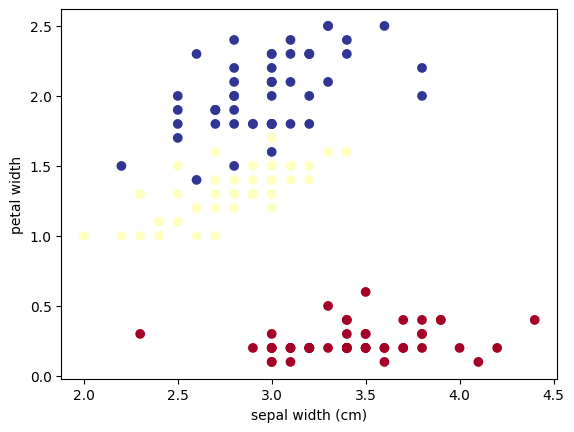

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width')

In [6]:
#SoftMax Regession (Multinomial logistic regression)
#it is the same method as with binomial logistic regession, the sklearn does it on its own:
#1.lr = LogisticRegression(random_state=0).fit(X, y) (create and train the model)
#2.probability = lr.predict_proba(X) (if we need probabilities of each sample)
#3.yhat = lr.predict(X) (prediction of class of each sample)
#4.accuracy_score(yhat, softmax_prediction) (evaluation)

#compute z_i (i: class)
lr = LogisticRegression(random_state=0).fit(X, y)

$$
\boldsymbol{ z_i = \theta_i^T·X + b} \\
P(y=i|x) = softmax(x,i) = \frac{e^{ \boldsymbol{\theta_i^T·\bf x}}}{\sum_{j=1}^K e^{\boldsymbol{\theta_j^T·\bf x}}} \\
\hat{y}=argmax_i  \{softmax(x,i)\}
$$

In [7]:
#probability for each sample (rows) belonging to different classes (columns)
#compute softmax(x,i)
probability = lr.predict_proba(X)

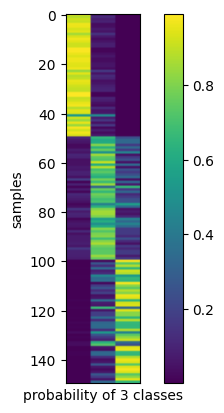

In [8]:
plot_probability_array(X, probability)

In [9]:
#1st sample probability: it's likely to belong to the class 0
probability[0, :]

array([9.57579132e-01, 4.23242810e-02, 9.65866230e-05])

In [10]:
#We see it sums to one.
probability[0, :].sum()

0.9999999999999999

In [11]:
#We can apply the 𝑎𝑟𝑔𝑚𝑎𝑥 function to get the prediction for the class.
#it selects the index (class) which corresponds to the maximum value (probability)
print(f'The 1st sample is predicted to belong in class: {np.argmax(probability[0,:])}')

The 1st sample is predicted to belong in class: 0


In [12]:
#class prediction for all the samples
#compute yhat
softmax_prediction = np.argmax(probability, axis=1)
softmax_prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
#We can verify that sklearn does this under the hood by comparing it to the output of the method predict
yhat = lr.predict(X)
accuracy_score(yhat, softmax_prediction)

1.0

In [14]:
#SVM multi-class
model = SVC(kernel='linear', gamma=0.5, probability=True)
model.fit(X, y)

SVC(gamma=0.5, kernel='linear', probability=True)

In [15]:
#model prediction and evaluation
yhat = model.predict(X)
accuracy_score(y, yhat)

0.96

{0, 1, 2}


<ipython-input-2-00c3a1ce3ea2>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


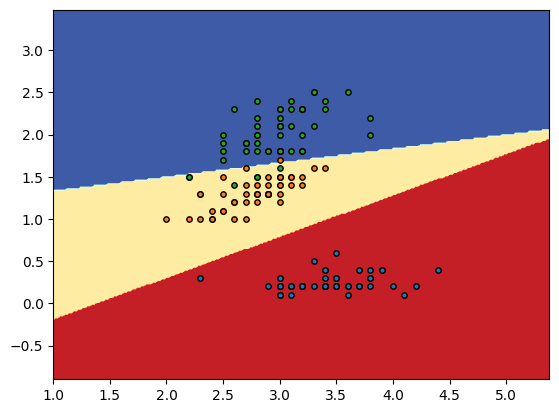

In [16]:
decision_boundary(X, y, model, iris)

{0, 1, 2}


<ipython-input-2-00c3a1ce3ea2>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


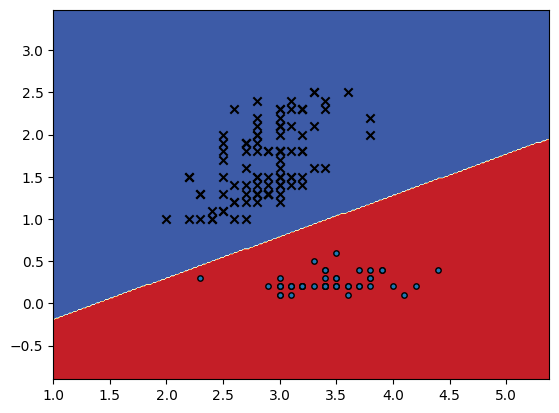

{0, 1, 2}


<ipython-input-2-00c3a1ce3ea2>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


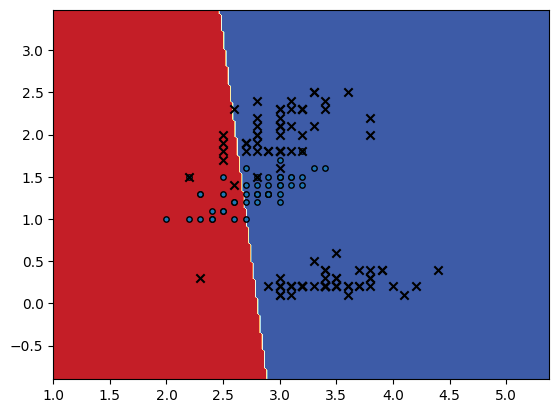

{0, 1, 2}


<ipython-input-2-00c3a1ce3ea2>:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


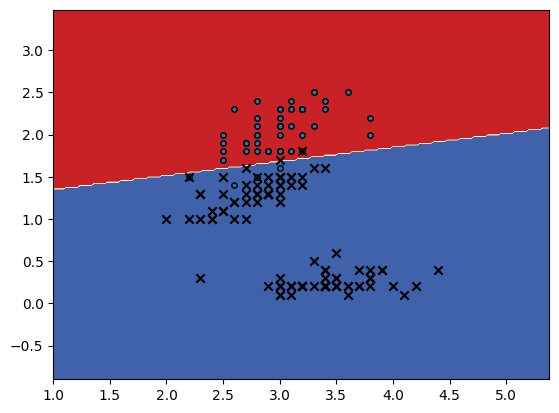

In [17]:
#dummy class
dummy_class=y.max()+1
#list used for classifiers
my_models=[]
#iterate through each class
for class_ in np.unique(y):
    #select the index of our  class
    select=(y==class_)
    temp_y=np.zeros(y.shape)
    #class, we are trying to classify
    temp_y[y==class_]=class_
    #set other samples  to a dummy class
    temp_y[y!=class_]=dummy_class
    #Train model and add to list
    model=SVC(kernel='linear', gamma=.5, probability=True)
    my_models.append(model.fit(X,temp_y))
    #plot decision boundary
    decision_boundary (X,temp_y,model,iris)

In [19]:
probability_array=np.zeros((X.shape[0],3))
for j,model in enumerate(my_models):

    real_class=np.where(np.array(model.classes_)!=3)[0]

    probability_array[:,j]=model.predict_proba(X)[:,real_class][:,0]

In [20]:
#Here, is the probability of belonging to each class for the first sample.
probability_array[0,:]

array([9.90737676e-01, 1.11249747e-01, 1.07144151e-11])

In [21]:
#As each is the probability of belonging to the actual class and not the dummy class,
# it does not sum to one.
probability_array[0,:].sum()

1.1019874233151818

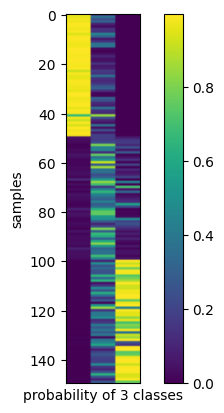

In [22]:
plot_probability_array(X, probability_array)

In [23]:
one_vs_all=np.argmax(probability_array,axis=1)
one_vs_all

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
accuracy_score(y,one_vs_all)

0.9466666666666667

In [25]:
accuracy_score(one_vs_all,yhat)

0.9733333333333334

In [26]:
#One vs One
#Here, we list each class.
classes_=set(np.unique(y))
classes_

{0, 1, 2}

In [27]:
#Determine the number of classifiers:
K=len(classes_)
K*(K-1)/2

3.0

class 0 vs class 1 


<ipython-input-2-00c3a1ce3ea2>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


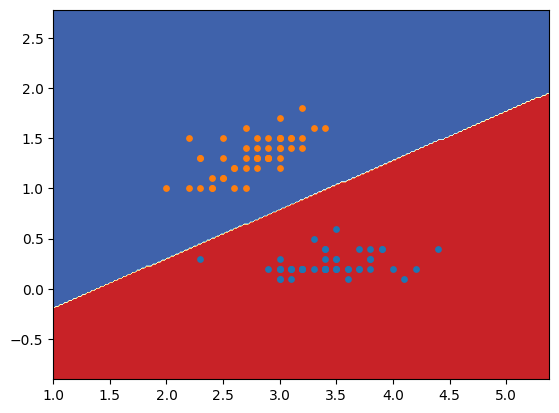

class 0 vs class 2 


<ipython-input-2-00c3a1ce3ea2>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


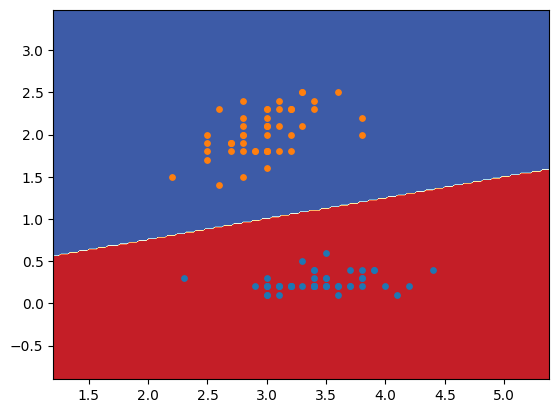

class 1 vs class 2 


<ipython-input-2-00c3a1ce3ea2>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], label=y,cmap=plt.cm.RdYlBu, s=15)


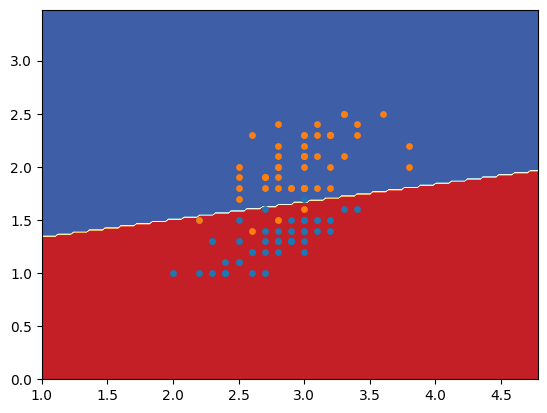

In [28]:
pairs=[]
left_overs=classes_.copy()
#list used for classifiers
my_models=[]
#iterate through each class
for class_ in classes_:
    #remove class we have seen before
    left_overs.remove(class_)
    #the second class in the pair
    for second_class in left_overs:
        pairs.append(str(class_)+' and '+str(second_class))
        print("class {} vs class {} ".format(class_,second_class) )
        temp_y=np.zeros(y.shape)
        #find classes in pair
        select=np.logical_or(y==class_ , y==second_class)
        #train model
        model=SVC(kernel='linear', gamma=.5, probability=True)
        model.fit(X[select,:],y[select])
        my_models.append(model)
        #Plot decision boundary for each pair and corresponding Training samples.
        decision_boundary (X[select,:],y[select],model,iris,two=True)

In [29]:
pairs

['0 and 1', '0 and 2', '1 and 2']

In [30]:
pairs
majority_vote_array=np.zeros((X.shape[0],3))
majority_vote_dict={}
for j,(model,pair) in enumerate(zip(my_models,pairs)):

    majority_vote_dict[pair]=model.predict(X)
    majority_vote_array[:,j]=model.predict(X)

In [31]:
#In the following table, each column is the output of a classifier
# for each pair of classes and the output is the prediction:
pd.DataFrame(majority_vote_dict).head(10)

,0 and 1,0 and 2,1 and 2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,0,1


In [32]:
#To perform classification on a sample, we perform a majority vote,
# that is, select the class with the most predictions.
# We repeat the process for each sample.
one_vs_one=np.array([np.bincount(sample.astype(int)).argmax() for sample  in majority_vote_array])
one_vs_one

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [33]:
#We calculate the accuracy:
accuracy_score(y,one_vs_one)

0.96

In [34]:
#If we compare it to sklearn, it's the same!
accuracy_score(yhat,one_vs_one)

1.0